<ipython-input-8-9a050c5d7b9d>:30: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna(0)


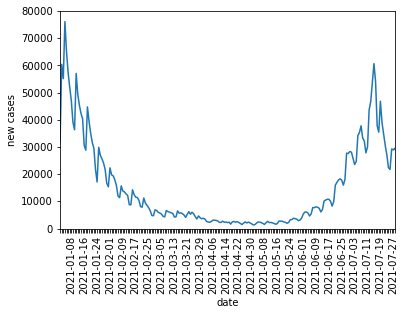

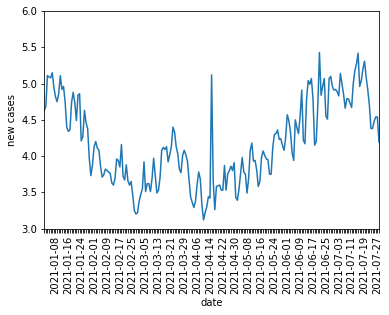

<ipython-input-8-9a050c5d7b9d>:81: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna(0)


FINAL THETA: [[-102.08    0.92    3.14   24.89]]
<class 'numpy.ndarray'>
FINAL TRAINING RESIDUALS: 63.22
TRAINING RMSE: 11.24
FINAL TEST RESIDUALS: 197.27
TESTING RMSE: 19.86


<ipython-input-8-9a050c5d7b9d>:188: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  testing_df = testing_df.dropna(0)
<ipython-input-8-9a050c5d7b9d>:194: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  testing_df = testing_df.dropna(0)


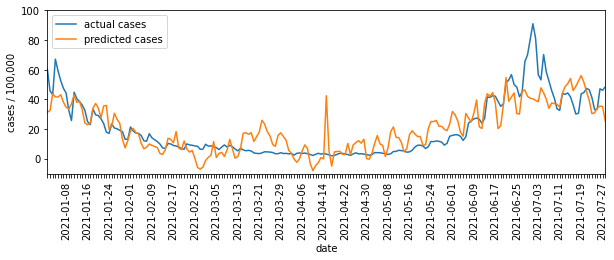

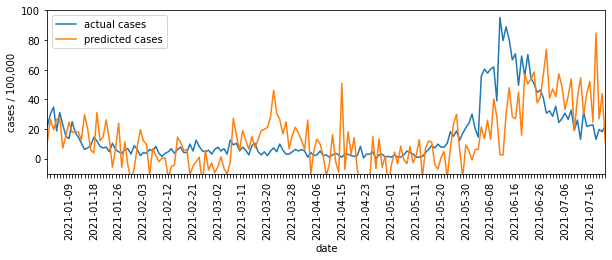

In [8]:
import pandas as pd
import time
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

############ set training data

df = pd.read_csv('uk_symptoms_and_cases.csv')

############ change case number to case rate

#populations = [192080, 261210, 143083, 160261, 218917, 211454, 179048, 634594, 144632, 142100, 69353, 128778, 612159, 481082, 187103, 144943, 294100, 75734, 382338, 338558, 20730, 530100, 104862, 96857, 236300, 428854, 151324, 342883, 160932, 118548, 371874, 156492, 1680669, 124041, 93772, 76775, 70770, 140783, 556930, 146762, 229084, 296561, 102361, 139070, 388969, 93010, 282445, 94297, 97805, 317707, 182922, 159965, 338487, 173356, 220464, 315309, 794008, 126158, 153726, 183600, 264000, 212800, 131756, 344810, 134758, 173138, 39071, 114381, 23207, 317267, 154004, 291538, 318793, 935868, 314328, 94564, 199581, 387785, 312872, 155432, 178300, 137259, 130064, 24770, 159492, 181543, 504376, 152914, 345000, 213885]
#n = 0
#currentArea = 'Aberdeen City'
#for index, row in df.iterrows():
#    if row['sub_region_1'] != currentArea:
#        currentArea = row['sub_region_1']
#        n += 1
#    df.iloc[index, -1] = (df.iloc[index, -1] / populations[n])*100000
    

############ drop columns that are not relevant or are empty

df = df.reset_index()

df = df.drop(['Unnamed: 0', 'country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id', 'symptom:Ageusia', 'symptom:Anosmia', 'symptom:Chills'], axis=1)
df = df.dropna(0) 

############ specify features and target

target = df.iloc[:, -1].name
features = df.iloc[:, :14].columns.tolist()

############ find correlations

correlations = df.corr()
#print(correlations[target])

############ plot data

#plt.rcParams["figure.figsize"] = (20,3)

#plt.scatter(x=df['symptom:Fever'], y=df['newCasesBySpecimenDate'])

plt.ylabel('new cases')
plt.xlabel('date')
plt.plot(df['date'], df['newCasesBySpecimenDate'])
ax = plt.gca()
plt.axis([0,208,0,80000])
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()


plt.ylabel('new cases')
plt.xlabel('date')
plt.plot(df['date'], df['symptom:Fever']) 
ax = plt.gca()
plt.axis([0,208,3,6])
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()

############ shift time series data

df['newCasesBySpecimenDate'] = df['newCasesBySpecimenDate'].shift(-14)
#plt.scatter(x=df['symptom:Fever'], y=df['newCasesBySpecimenDate'])
df = df.dropna(0) 

############ drop features that have low correlation in graph or data

df = df.drop(['symptom:Chest pain', 'symptom:Fatigue', 'symptom:Headache', 'symptom:Migraine', 'symptom:Nasal congestion', 'symptom:Nausea', 'symptom:Pneumonia', 'symptom:Shortness of breath'], axis=1)

############ find correlation between variables, drop overlapping variables

#correlations = df.corr()
#print(correlations[target])

#fig_1 = plt.figure(figsize=(12, 10))
#new_correlations = df.corr()
#sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
#plt.title('Pearson Correlation Matrix')
#plt.show()

df = df.drop(['symptom:Sore throat', 'symptom:Vomiting'], axis=1)

############ update features and store the length of the features

features = df.iloc[:, 2:5].columns.tolist()
len_of_features = len(features)

############ create x, y and theta matrices


############ divide by population to get case rate
df.iloc[:, 5:6] = df.iloc[:, 5:6].divide(66650000).mul(100000)
X = df.iloc[:, 2:5]
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 5:6].values
theta = np.zeros([1, len_of_features + 1])

############ store target

target = y

#print(X.shape, y.shape, theta.shape)

########### define cost function - mean sum of squared residuals

def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

############ set maximum iterations and learning rate

alpha = 0.01
iterations = 30000

############ define gradient descent function

def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

############ do gradient descent and display final theta

final_theta, cost = gradientdescent(X, y, theta, iterations, alpha)
print('FINAL THETA: ' + str(final_theta.round(2)))

#fig_2, ax = plt.subplots(figsize=(10, 8))
#ax.plot(np.arange(iterations), cost, 'r')
#ax.set_xlabel('Iterations')
#ax.set_ylabel('Cost')
#ax.set_title('Iterations vs. Cost')
#plt.show()

############ sample prediction for first observation

predictions = X @ final_theta.T
df['predictions'] = predictions
print(type(predictions[0].round(2)))

############ final cost

training_residuals = computecost(X, y, final_theta)
print('FINAL TRAINING RESIDUALS: ' + str(training_residuals.round(2)))

############ root mean squared error

def rmse(target, final_theta, X):
    predictions = X @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

rmse_val = rmse(target, final_theta, X)
print('TRAINING RMSE: ' + str(rmse_val.round(2)))

############ standard deviation, mean and variance around the mean of training data

std_training_data = df['newCasesBySpecimenDate'].std()
mean_training_data = df['newCasesBySpecimenDate'].mean()
var_mean_training_data = df['newCasesBySpecimenDate'].var()

############ set and clean testing data 

testing_df = pd.read_csv('Aberdeen City_symptoms_and_cases.csv')
testing_df = testing_df.reset_index()
testing_df = testing_df.drop(['Unnamed: 0', 'country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id', 'symptom:Ageusia', 'symptom:Anosmia', 'symptom:Chills'], axis=1)
testing_df = testing_df.dropna(0) 

testing_target = testing_df.iloc[:, -1].name
testing_features = testing_df.iloc[:, :14].columns.tolist()

testing_df['newCasesBySpecimenDate'] = testing_df['newCasesBySpecimenDate'].shift(-14)
testing_df = testing_df.dropna(0) 

testing_df = testing_df.drop(['symptom:Chest pain', 'symptom:Fatigue', 'symptom:Headache', 'symptom:Migraine', 'symptom:Nasal congestion', 'symptom:Nausea', 'symptom:Pneumonia', 'symptom:Shortness of breath'], axis=1)

testing_df = testing_df.drop(['symptom:Sore throat', 'symptom:Vomiting'], axis=1)

testing_features = testing_df.iloc[:, 2:5].columns.tolist()
len_of_testing_features = len(testing_features)

############ divide by population to get case rate
testing_df.iloc[:, 5:6] = testing_df.iloc[:, 5:6].divide(192080).mul(100000)
testing_X = testing_df.iloc[:, 2:5]
testing_ones = np.ones([len(testing_df), 1])
testing_X = np.concatenate((testing_ones, testing_X), axis=1)
testing_y = testing_df.iloc[:, 5:6].values

testing_target = y

############ calculate testing data residuals

testing_residuals = computecost(testing_X, testing_y, final_theta)

print('FINAL TEST RESIDUALS: ' + str(testing_residuals.round(2)))

testing_predictions = testing_X @ final_theta.T
testing_df['predictions'] = testing_predictions
#print(str(testing_predictions[0].round(2)))

rmse_test = rmse(testing_y, final_theta, testing_X)
print('TESTING RMSE: ' + str(rmse_test.round(2)))

plt.rcParams["figure.figsize"] = (10,3)
plt.xlabel('date')
plt.ylabel('cases / 100,000')
plt.plot(df['date'], df['newCasesBySpecimenDate'], label = "actual cases")
plt.plot(df['date'], df['predictions'], label = "predicted cases") 
plt.legend()
ax = plt.gca()
plt.axis([0,208,-10,100])
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()

plt.rcParams["figure.figsize"] = (10,3)
plt.xlabel('date')
plt.ylabel('cases / 100,000')
plt.plot(testing_df['date'], testing_df['newCasesBySpecimenDate'], label = "actual cases")
plt.plot(testing_df['date'], testing_df['predictions'], label = "predicted cases") 
plt.legend()
ax = plt.gca()
plt.axis([0,180,-10,100])
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()
